## Fetch Data

In [1]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Data Cleaning

In [3]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# checking if there is any NULL data 
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# see NaN samples
data[pd.isnull(data["total_bedrooms"])]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [6]:
# We will fill in the missing data in the total_bedrooms column according to the ocean_proximity average.
unique_ocean_proximity = pd.unique(data.ocean_proximity)
print(f"number of Unique ocean_proximity: {len(unique_ocean_proximity)}")
unique_ocean_proximity[:10]

# find total_bedrooms averages in ocean_proximity specific
# Equalize the average total_bedrooms values ​​to the missing values ​​in total_bedrooms specific to ocean_proximity
temp_data = data.copy()  # set temp_data variable to avoid losing real data
total_bedrooms = ["total_bedrooms"]
for o in unique_ocean_proximity:
    
    # create ocean_proximity filter
    ocean_proximity_filtre = temp_data.ocean_proximity == o
    # filter data by ocean_proximity
    fitered_data = temp_data[ocean_proximity_filtre]
    
    # find average for total_bedrooms in ocean_proximity
    for s in total_bedrooms:
        mean = np.round(np.mean(fitered_data[s]),2)
        if ~np.isnan(mean): # if ocean_proximity property has average
            fitered_data[s] = fitered_data[s].fillna(mean)
        else: # find average for all data if no average in ocean_proximity
            all_data_mean = np.round(np.mean(data[s]),2)
            fitered_data[s] = fitered_data[s].fillna(all_data_mean)
    # Synchronize data filled with missing values ​​in ocean_proximity to data temporary            
    temp_data[ocean_proximity_filtre] = fitered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy() 
data.info()

number of Unique ocean_proximity: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# statistical information about data
data.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.880895,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.267735,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# drop unnecessary columns
data = data.drop(["longitude", "latitude"], axis = 1)
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Exploratory Data Analysis and Data Visualization

In [9]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   total_bedrooms      20640 non-null  float64
 3   population          20640 non-null  float64
 4   households          20640 non-null  float64
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  float64
 7   ocean_proximity     20640 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [10]:
# statistical information about data
data.describe() 

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.880895,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,419.267735,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


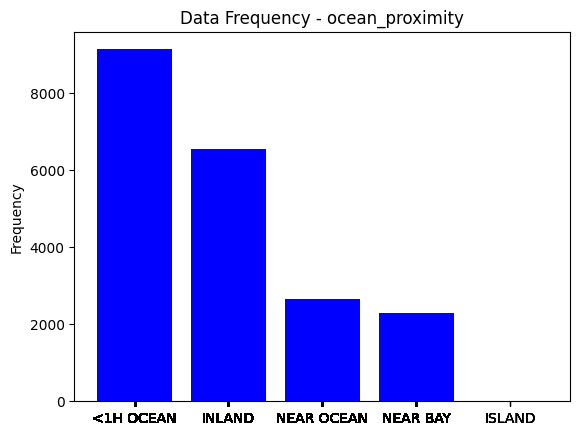

Number of Samples According to ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [11]:
# Number of samples according to ocean_proximity 
plt.figure()
plt.bar(data["ocean_proximity"].value_counts().index, data["ocean_proximity"].value_counts(), color = "blue")
plt.xticks(data["ocean_proximity"].values)
plt.ylabel("Frequency")
plt.title("Data Frequency - ocean_proximity")
plt.show()
print(f"Number of Samples According to ocean_proximity\n{data['ocean_proximity'].value_counts()}")

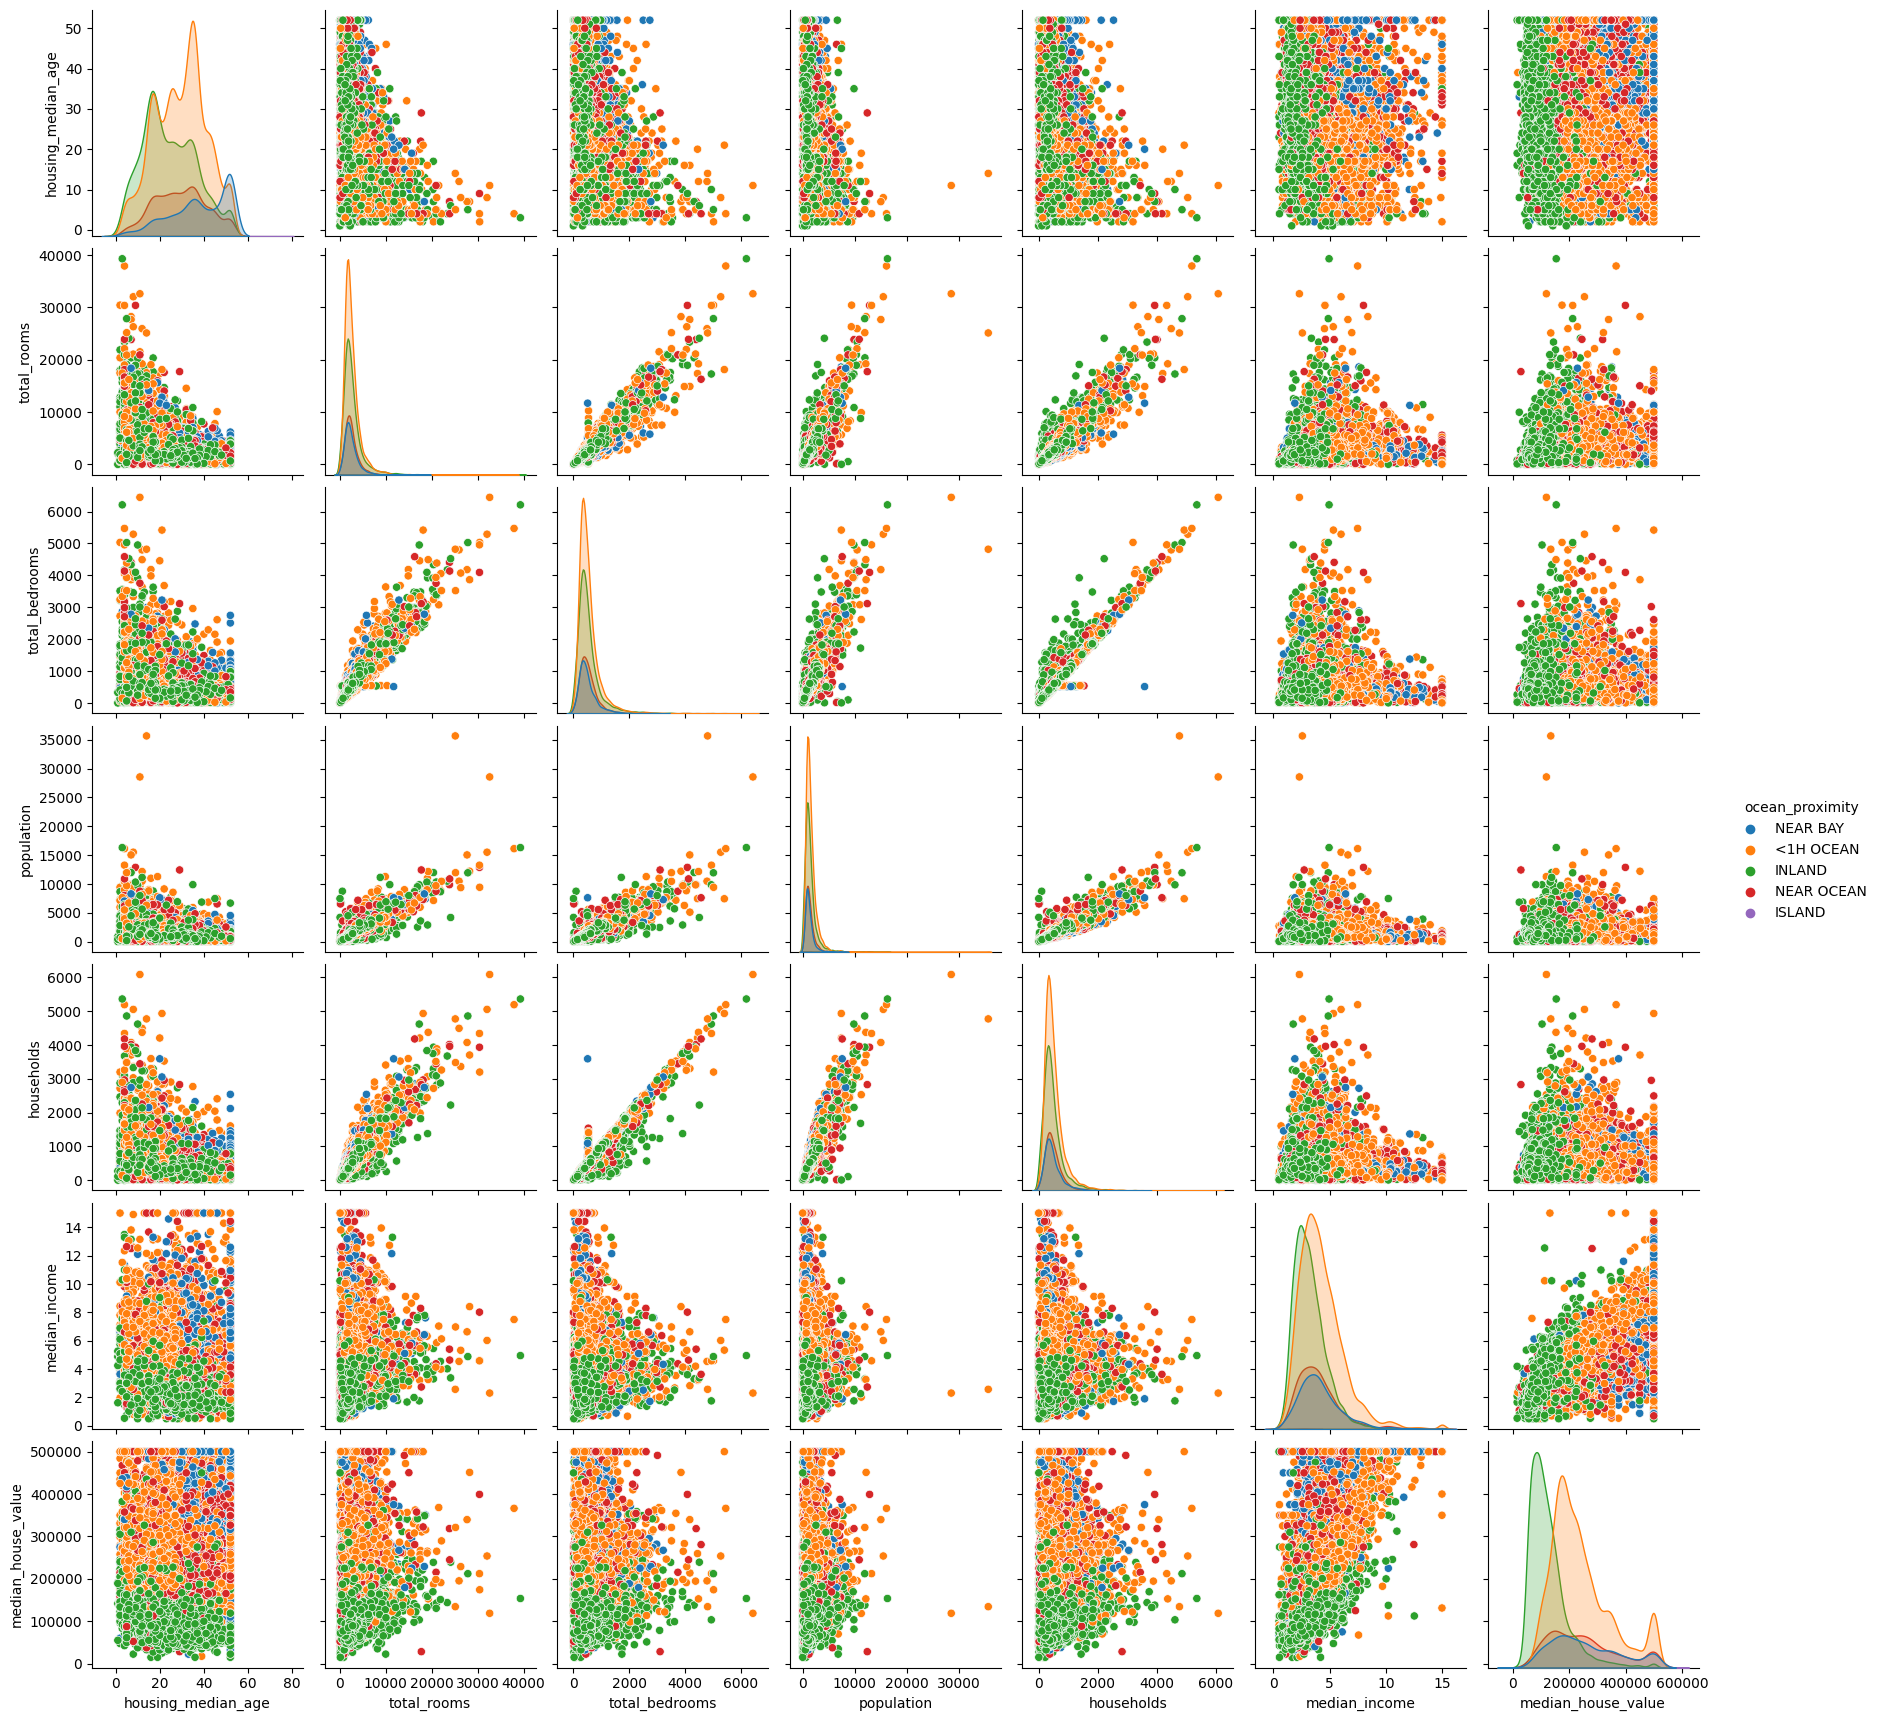

In [12]:
# see pairplot for relation between the variables 
sns.pairplot(data, hue="ocean_proximity")
plt.show()

In [13]:
# function for plot histogram
def plotHistogram(column):
    """
        input: Column name
        output: Histogram plot
    """
    
    plt.figure()
    plt.hist(data[column], bins = 55, color = "orange")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Data Frequency - {column}")
    plt.show()

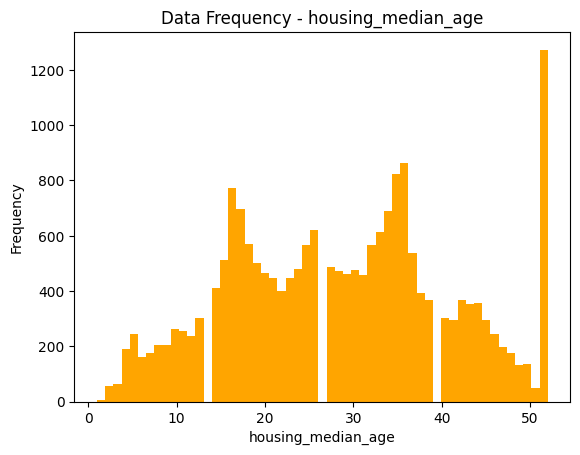

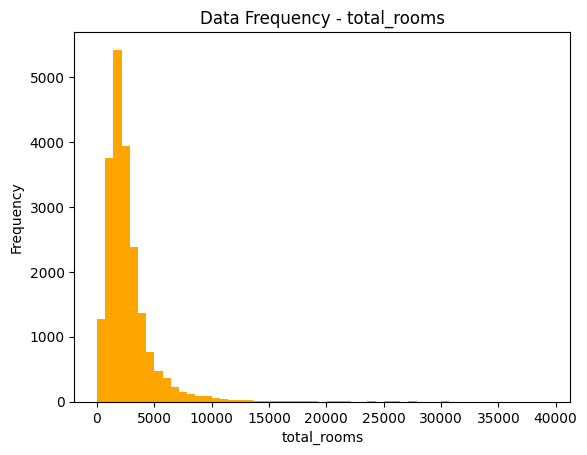

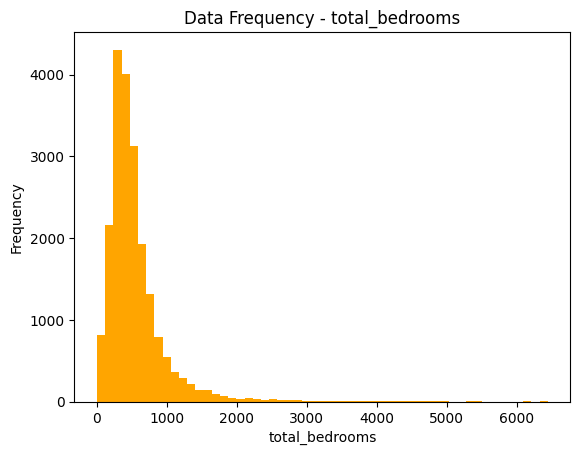

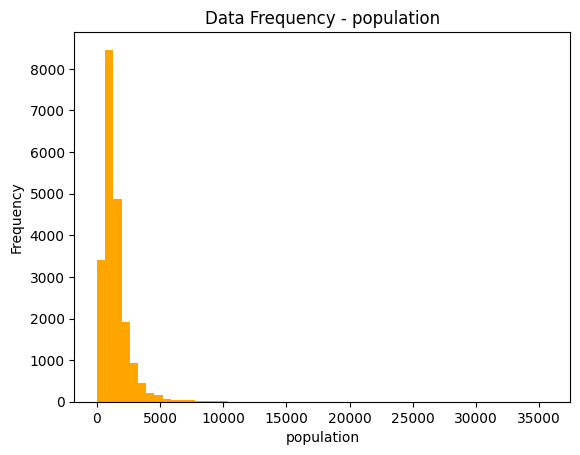

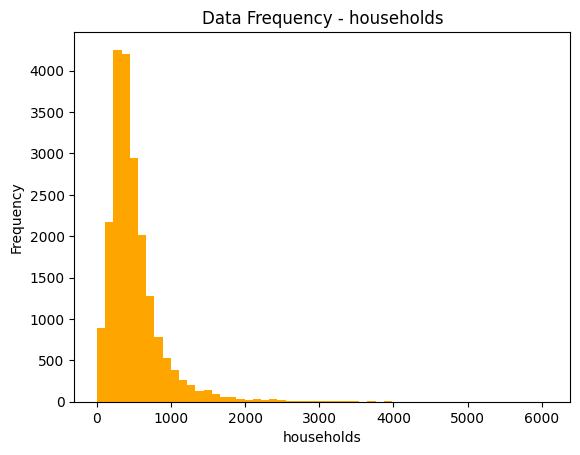

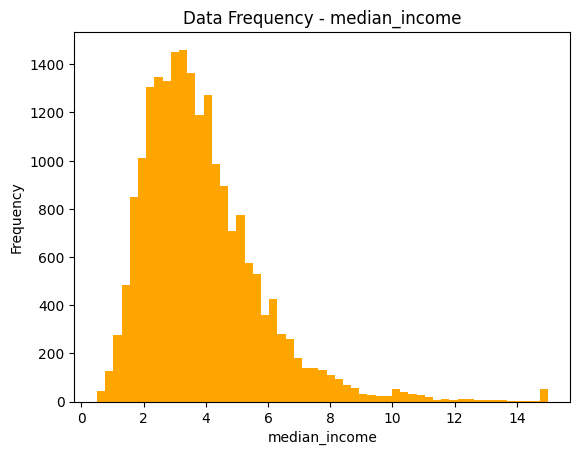

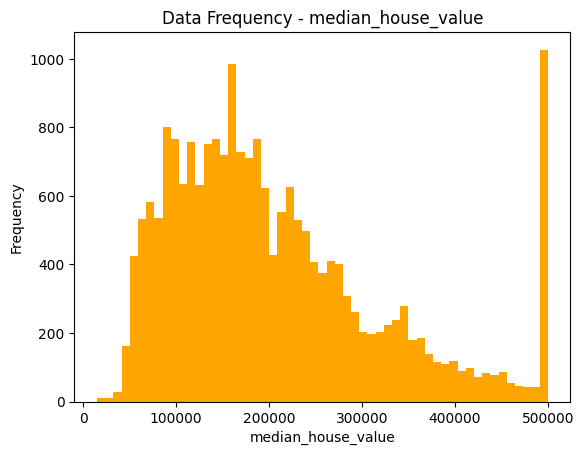

In [14]:
# plot histogram for numerical variables 
numerical_variables = ["housing_median_age", "total_rooms", "total_bedrooms",
                       "population", "households", "median_income", "median_house_value"]
for i in numerical_variables:
    plotHistogram(i)

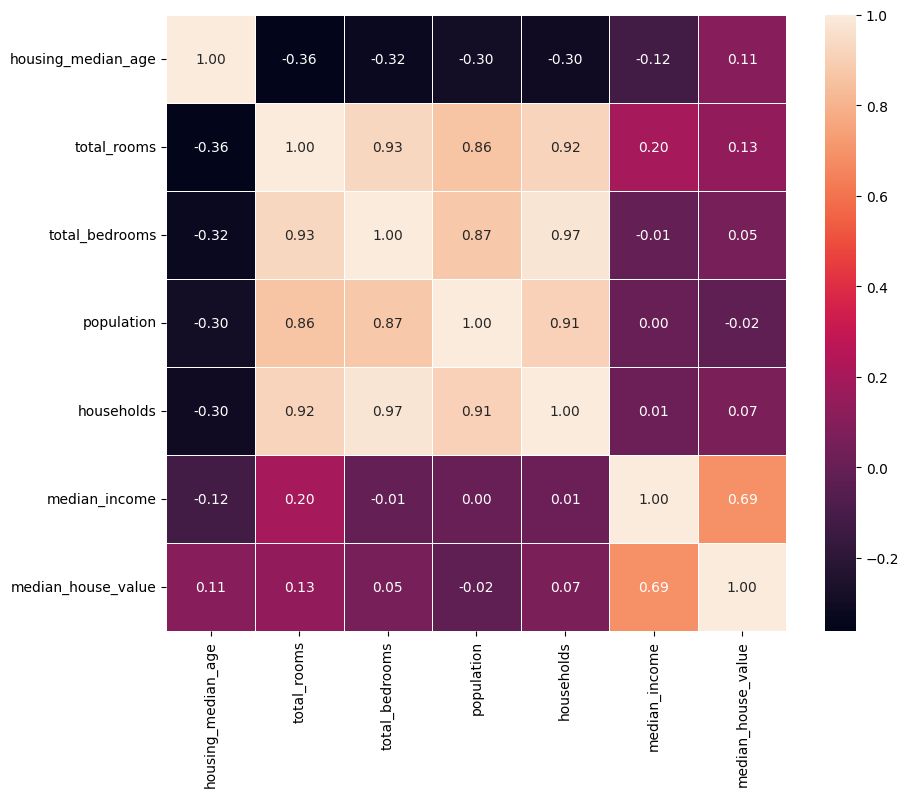

In [15]:
# correlation between numerical variables
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

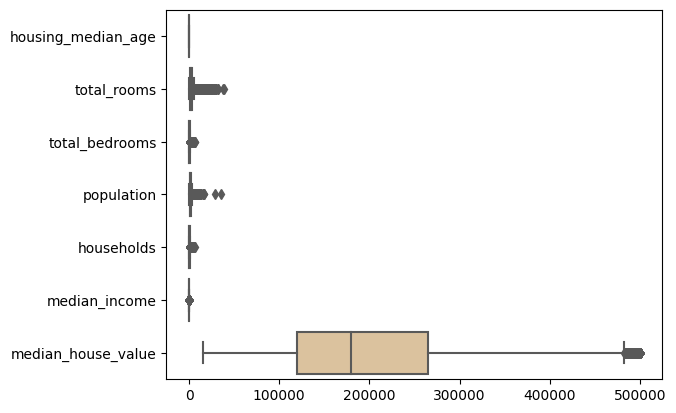

In [16]:
sns.boxplot(data=data.loc[:,["housing_median_age", "total_rooms", "total_bedrooms",
                             "population", "households", "median_income", "median_house_value"]],
            orient="h", palette="Set2")
plt.show()

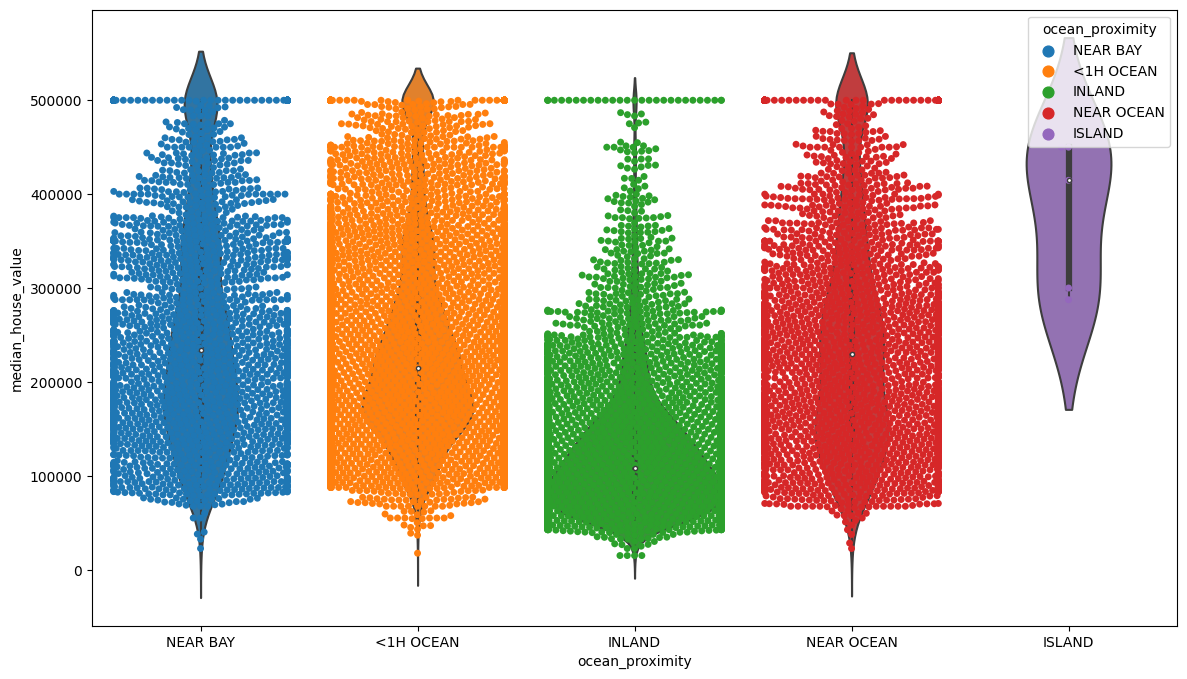

In [17]:
plt.figure(figsize = (14,8))
sns.swarmplot(x = 'ocean_proximity', y = 'median_house_value', data = data, hue = 'ocean_proximity')
sns.violinplot(x = 'ocean_proximity', y = 'median_house_value', data = data)
plt.show()

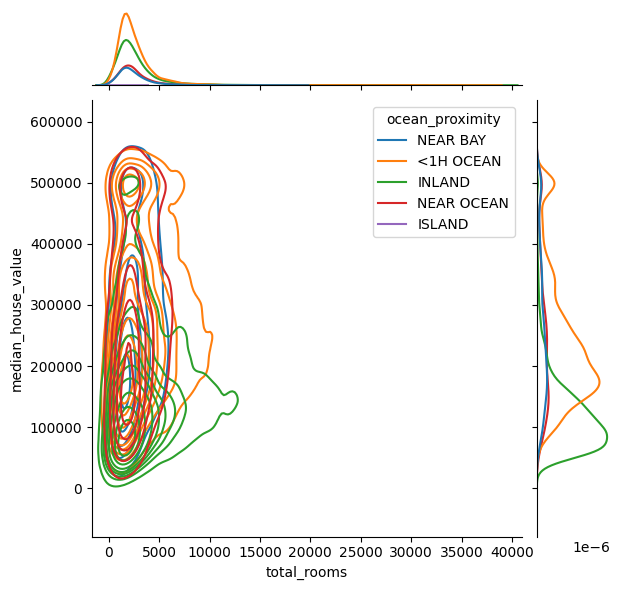

In [18]:
sns.jointplot(
    data=data,
    x="total_rooms", y="median_house_value", hue="ocean_proximity",
    kind="kde")
plt.show()

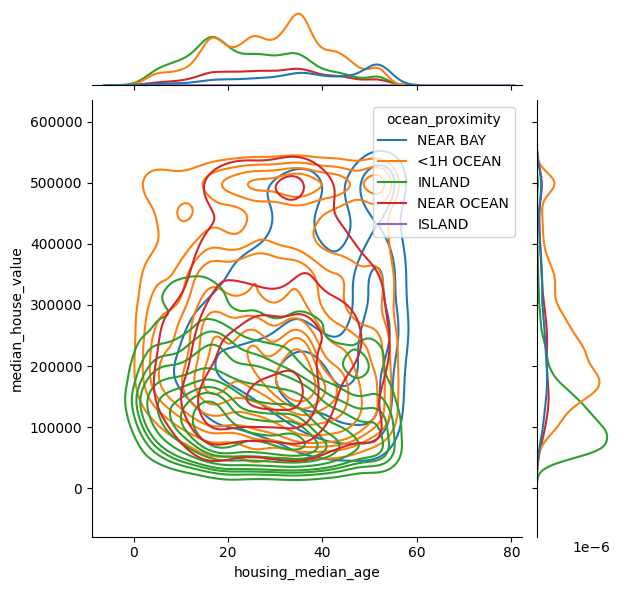

In [19]:
sns.jointplot(
    data=data,
    x="housing_median_age", y="median_house_value", hue="ocean_proximity",
    kind="kde")
plt.show()

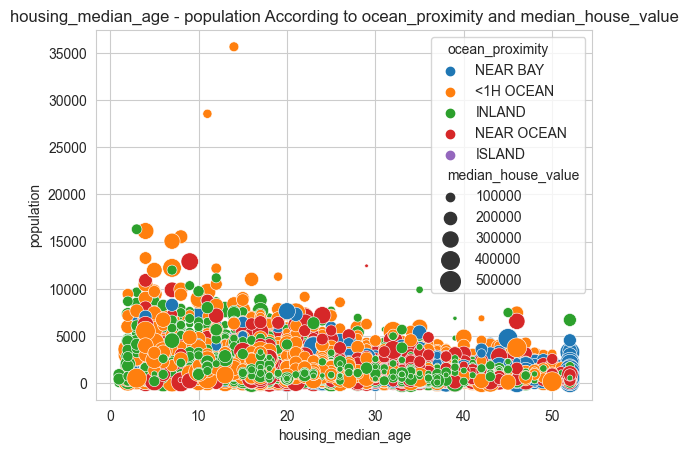

In [20]:
sns.set_style("whitegrid")
sns.scatterplot(x="housing_median_age", y="population", hue="ocean_proximity",
                size="median_house_value", sizes=(1,200), data=data)
plt.xlabel("housing_median_age")
plt.ylabel("population")
plt.title("housing_median_age - population According to ocean_proximity and median_house_value")
plt.show()

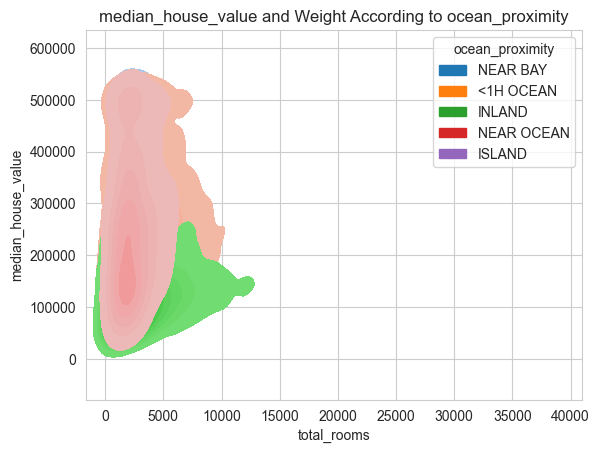

In [21]:
sns.kdeplot(data=data, x="total_rooms", y="median_house_value", hue="ocean_proximity", fill = True)
plt.xlabel("total_rooms")
plt.ylabel("median_house_value")
plt.title("median_house_value and Weight According to ocean_proximity")
plt.show()

In [22]:
# define a function for+ anomaly detection
def anomalyDetection(df, columns):
    outlier_indices = []
    
    for c in columns:
        # first quartile
        Q1 = np.percentile(df[c],25)
        # third quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # multiplier for outlier detection
        outlier_step = IQR * 1.5
        # detect outlier and outlier index
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indexes
        outlier_indices.extend(outlier_list_col)
    
    # find unique outliers
    outlier_indices = Counter(outlier_indices)
    # if a sample (v) is outlier for 1 different column then treat it as outlier (v>1)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

In [23]:
data_anomaly = data.loc[anomalyDetection(data, ["housing_median_age", "total_rooms", "total_bedrooms",
                                                "population", "households", "median_income", "median_house_value"])]
data_anomaly.ocean_proximity.value_counts()

<1H OCEAN     875
INLAND        507
NEAR OCEAN    230
NEAR BAY      212
Name: ocean_proximity, dtype: int64

In [24]:
# create new data for drop anomaly data
datawithNoAnomaly = data
datawithNoAnomaly.shape

(20640, 8)

In [25]:
# drop anomaly data 
for i in data_anomaly.index:
    datawithNoAnomaly.drop(labels=i, inplace=True)

In [26]:
# this data use for see an effect of outliers in full data
# 20640 - 1824 = 18816
datawithNoAnomaly.shape

(18816, 8)

## Preprocessing

In [27]:
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn

In [28]:
data["ocean_proximity"] = labelEncoder(data["ocean_proximity"])

Encoding Approach:
NEAR BAY  ==>  3
<1H OCEAN  ==>  0
INLAND  ==>  1
NEAR OCEAN  ==>  4
ISLAND  ==>  2


In [29]:
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3


In [30]:
# create input and output
X = data.drop('median_house_value', axis = 1)
y = data['median_house_value']

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standardScale = StandardScaler()
standardScale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (15052, 7)
y_train: (15052,)
X_test: (3764, 7)
y_test: (3764,)


In [32]:
# import libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# make a function that include all regression models
def allRegressors(X_train, X_test, y_train, y_test):
    """
    This function use multiple machine learning regressors and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R Square for each regressors
    """
    
    # for Linear Regression
    print("*************************************************************************")
    lm_model = LinearRegression()
    lm_model.fit(X_train, y_train)
    lm_train_predictions = lm_model.predict(X_train)
    lm_test_predictions = lm_model.predict(X_test)
    print('Train MSE for Linear Regression:', mean_squared_error(y_train, lm_train_predictions))
    print('Test MSE for Linear Regression:', mean_squared_error(y_test, lm_test_predictions))
    print('Train RMSE for Linear Regression:', np.sqrt(mean_squared_error(y_train, lm_train_predictions)))
    print('Test RMSE for Linear Regression:', np.sqrt(mean_squared_error(y_test, lm_test_predictions)))
    print('Train MAE for Linear Regression:', mean_absolute_error(y_train, lm_train_predictions))
    print('Test MAE for Linear Regression:', mean_absolute_error(y_test, lm_test_predictions))
    print('Train R Square for Linear Regression:', r2_score(y_train, lm_train_predictions))
    print('Test R Square for Linear Regression:', r2_score(y_test, lm_test_predictions))
    
    
    # for Support Vector Machine Regressor
    print("*************************************************************************")
    svm_model = SVR()
    svm_model.fit(X_train, y_train)
    svm_train_predictions = svm_model.predict(X_train)
    svm_test_predictions = svm_model.predict(X_test)
    print('Train MSE for Support Vector Regression:', mean_squared_error(y_train, svm_train_predictions))
    print('Test MSE for Support Vector Regression:', mean_squared_error(y_test, svm_test_predictions))
    print('Train RMSE for Support Vector Regression:', np.sqrt(mean_squared_error(y_train, svm_train_predictions)))
    print('Test RMSE for Support Vector Regression:', np.sqrt(mean_squared_error(y_test, svm_test_predictions)))
    print('Train MAE for Support Vector Regression:', mean_absolute_error(y_train, svm_train_predictions))
    print('Test MAE for Support Vector Regression:', mean_absolute_error(y_test, svm_test_predictions))
    print('Train R Square for Support Vector Regression:', r2_score(y_train, svm_train_predictions))
    print('Test R Square for Support Vector Regression:', r2_score(y_test, svm_test_predictions))
    
    # for Random Forest Regression
    print("*************************************************************************")
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    rf_train_predictions = rf_model.predict(X_train)
    rf_test_predictions = rf_model.predict(X_test)
    print('Train MSE for Random Forest Regression:', mean_squared_error(y_train, rf_train_predictions))
    print('Test MSE for Random Forest Regression:', mean_squared_error(y_test, rf_test_predictions))
    print('Train RMSE for Random Forest Regression:', np.sqrt(mean_squared_error(y_train, rf_train_predictions)))
    print('Test RMSE for Random Forest Regression:', np.sqrt(mean_squared_error(y_test, rf_test_predictions)))
    print('Train MAE for Random Forest Regression:', mean_absolute_error(y_train, rf_train_predictions))
    print('Test MAE for Random Forest Regression:', mean_absolute_error(y_test, rf_test_predictions))
    print('Train R Square for Random Forest Regression:', r2_score(y_train, rf_train_predictions))
    print('Test R Square for Random Forest Regression:', r2_score(y_test, rf_test_predictions))
    
    # for Gradient Boosting Regression
    print("*************************************************************************")
    gb_model = GradientBoostingRegressor()
    gb_model.fit(X_train, y_train)
    gb_train_predictions = gb_model.predict(X_train)
    gb_test_predictions = gb_model.predict(X_test)
    print('Train MSE for Gradient Boosting Regression:', mean_squared_error(y_train, gb_train_predictions))
    print('Test MSE for Gradient Boosting Regression:', mean_squared_error(y_test, gb_test_predictions))
    print('Train RMSE for Gradient Boosting Regression:', np.sqrt(mean_squared_error(y_train, gb_train_predictions)))
    print('Test RMSE for Gradient Boosting Regression:', np.sqrt(mean_squared_error(y_test, gb_test_predictions)))
    print('Train MAE for Gradient Boosting Regression:', mean_absolute_error(y_train, gb_train_predictions))
    print('Test MAE for Gradient Boosting Regression:', mean_absolute_error(y_test, gb_test_predictions))
    print('Train R Square for Gradient Boosting Regression:', r2_score(y_train, gb_train_predictions))
    print('Test R Square for Gradient Boosting Regression:', r2_score(y_test, gb_test_predictions))
    
    # for KNeighbors Regression
    print("*************************************************************************")
    kn_model = KNeighborsRegressor()
    kn_model.fit(X_train, y_train)
    kn_train_predictions = kn_model.predict(X_train)
    kn_test_predictions = kn_model.predict(X_test)
    print('Train MSE for KNeighbors Regression:', mean_squared_error(y_train, kn_train_predictions))
    print('Test MSE for KNeighbors Regression:', mean_squared_error(y_test, kn_test_predictions))
    print('Train RMSE for KNeighbors Regression:', np.sqrt(mean_squared_error(y_train, kn_train_predictions)))
    print('Test RMSE for KNeighbors Regression:', np.sqrt(mean_squared_error(y_test, kn_test_predictions)))
    print('Train MAE for KNeighbors Regression:', mean_absolute_error(y_train, kn_train_predictions))
    print('Test MAE for KNeighbors Regression:', mean_absolute_error(y_test, kn_test_predictions))
    print('Train R Square for KNeighbors Regression:', r2_score(y_train, kn_train_predictions))
    print('Test R Square for KNeighbors Regression:', r2_score(y_test, kn_test_predictions))
    
    # for Decision Tree Regresion
    print("*************************************************************************")
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train, y_train)
    dt_train_predictions = dt_model.predict(X_train)
    dt_test_predictions = dt_model.predict(X_test)
    print('Train MSE for Decision Tree Regresion:', mean_squared_error(y_train, dt_train_predictions))
    print('Test MSE for Decision Tree Regresion:', mean_squared_error(y_test, dt_test_predictions))
    print('Train RMSE for Decision Tree Regresion:', np.sqrt(mean_squared_error(y_train, dt_train_predictions)))
    print('Test RMSE for Decision Tree Regresion:', np.sqrt(mean_squared_error(y_test, dt_test_predictions)))
    print('Train MAE for Decision Tree Regresion:', mean_absolute_error(y_train, dt_train_predictions))
    print('Test MAE for Decision Tree Regresion:', mean_absolute_error(y_test, dt_test_predictions))
    print('Train R Square for Decision Tree Regresion:', r2_score(y_train, dt_train_predictions))
    print('Test R Square for Decision Tree Regresion:', r2_score(y_test, dt_test_predictions))
    
    # for Ridge Regression
    print("*************************************************************************")
    rid_model = Ridge(alpha=.5)
    rid_model.fit(X_train, y_train)
    rid_train_predictions = rid_model.predict(X_train)
    rid_test_predictions = rid_model.predict(X_test)
    print('Train MSE for Ridge Regression:', mean_squared_error(y_train, rid_train_predictions))
    print('Test MSE for Ridge Regression:', mean_squared_error(y_test, rid_test_predictions))
    print('Train RMSE for Ridge Regression:', np.sqrt(mean_squared_error(y_train, rid_train_predictions)))
    print('Test RMSE for Ridge Regression:', np.sqrt(mean_squared_error(y_test, rid_test_predictions)))
    print('Train MAE for Ridge Regression:', mean_absolute_error(y_train, rid_train_predictions))
    print('Test MAE for Ridge Regression:', mean_absolute_error(y_test, rid_test_predictions))
    print('Train R Square for Ridge Regression:', r2_score(y_train, rid_train_predictions))
    print('Test R Square for Ridge Regression:', r2_score(y_test, rid_test_predictions))
    
    # Summary
    print("---------------------------Summary---------------------------")
    print("*************************************************************************")
    print('Test MAE for Linear Regression:', mean_absolute_error(y_test, lm_test_predictions))
    print('Test RMSE for Linear Regression:', np.sqrt(mean_squared_error(y_test, lm_test_predictions)))
    print('Test R Square for Linear Regression:', r2_score(y_test, lm_test_predictions))
    print("*************************************************************************")
    print('Test MAE for Support Vector Regression:', mean_absolute_error(y_test, svm_test_predictions))
    print('Test RMSE for Support Vector Regression:', np.sqrt(mean_squared_error(y_test, svm_test_predictions)))
    print('Test R Square for Support Vector Regression:', r2_score(y_test, svm_test_predictions))
    print("*************************************************************************")
    print('Test MAE for Random Forest Regression:', mean_absolute_error(y_test, rf_test_predictions))
    print('Test RMSE for Random Forest Regression:', np.sqrt(mean_squared_error(y_test, rf_test_predictions)))
    print('Test R Square for Random Forest Regression:', r2_score(y_test, rf_test_predictions))
    print("*************************************************************************")
    print('Test MAE for Gradient Boosting Regression:', mean_absolute_error(y_test, gb_test_predictions))
    print('Test RMSE for Gradient Boosting Regression:', np.sqrt(mean_squared_error(y_test, gb_test_predictions)))
    print('Test R Square for Gradient Boosting Regression:', r2_score(y_test, gb_test_predictions))
    print("*************************************************************************")
    print('Test MAE for KNeighbors Regression:', mean_absolute_error(y_test, kn_test_predictions))
    print('Test RMSE for KNeighbors Regression:', np.sqrt(mean_squared_error(y_test, kn_test_predictions)))
    print('Test R Square for KNeighbors Regression:', r2_score(y_test, kn_test_predictions))
    print("*************************************************************************")
    print('Test MAE for Decision Tree Regresion:', mean_absolute_error(y_test, dt_test_predictions))
    print('Test RMSE for Decision Tree Regresion:', np.sqrt(mean_squared_error(y_test, dt_test_predictions)))
    print('Test R Square for Decision Tree Regresion:', r2_score(y_test, dt_test_predictions))
    print("*************************************************************************")
    print('Test MAE for Ridge Regression:', mean_absolute_error(y_test, rid_test_predictions))
    print('Test RMSE for Ridge Regression:', np.sqrt(mean_squared_error(y_test, rid_test_predictions)))
    print('Test R Square for Ridge Regression:', r2_score(y_test, rid_test_predictions))
    print("*************************************************************************")

In [33]:
allRegressors(X_train, X_test, y_train, y_test)   

*************************************************************************
Train MSE for Linear Regression: 5400830126.892857
Test MSE for Linear Regression: 5344954177.5809
Train RMSE for Linear Regression: 73490.34036451904
Test RMSE for Linear Regression: 73109.19352298246
Train MAE for Linear Regression: 53825.845138475546
Test MAE for Linear Regression: 53734.326533573105
Train R Square for Linear Regression: 0.5369973313757515
Test R Square for Linear Regression: 0.5380626665660905
*************************************************************************
Train MSE for Support Vector Regression: 12200036652.758343
Test MSE for Support Vector Regression: 12047153149.041815
Train RMSE for Support Vector Regression: 110453.77609098905
Test RMSE for Support Vector Regression: 109759.52418374369
Train MAE for Support Vector Regression: 83105.0860830152
Test MAE for Support Vector Regression: 82500.9826825041
Train R Square for Support Vector Regression: -0.04588542776302296
Test R Squar

## Use the Data With No Anomaly 

In [34]:
datawithNoAnomaly

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [35]:
# Creating various attributes to compare and correlate

datawithNoAnomaly["rooms_per_household"] = datawithNoAnomaly["total_rooms"] / datawithNoAnomaly["households"]
datawithNoAnomaly["bedrooms_per_room"] = datawithNoAnomaly["total_bedrooms"] / datawithNoAnomaly["total_rooms"]
datawithNoAnomaly["population_per_householed"] = datawithNoAnomaly["population"] / datawithNoAnomaly["households"]

In [36]:
datawithNoAnomaly.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_householed
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467
5,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3,4.761658,0.231774,2.139896


In [37]:
corr_matrix = datawithNoAnomaly.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.636931
total_rooms                  0.181464
housing_median_age           0.113688
rooms_per_household          0.112700
households                   0.093412
ocean_proximity              0.078982
total_bedrooms               0.069956
population_per_householed   -0.037313
population                  -0.050756
bedrooms_per_room           -0.182044
Name: median_house_value, dtype: float64

In [38]:
# create input and output
XnoAnomaly = datawithNoAnomaly.drop('median_house_value', axis = 1)
ynoAnomaly = datawithNoAnomaly['median_house_value']

standardScale = StandardScaler()
standardScale.fit_transform(XnoAnomaly)

X_trainnoAnomaly, X_testnoAnomaly, y_trainnoAnomaly, y_testnoAnomaly = train_test_split(XnoAnomaly, ynoAnomaly,
                                                                                        test_size = 0.20)

# see train and test dataset shape
print("X_train:", X_trainnoAnomaly.shape)
print("y_train:", y_trainnoAnomaly.shape)

print("X_test:", X_testnoAnomaly.shape)
print("y_test:", y_testnoAnomaly.shape)

X_train: (15052, 10)
y_train: (15052,)
X_test: (3764, 10)
y_test: (3764,)


In [39]:
allRegressors(X_trainnoAnomaly, X_testnoAnomaly, y_trainnoAnomaly, y_testnoAnomaly)

*************************************************************************
Train MSE for Linear Regression: 5394778825.312987
Test MSE for Linear Regression: 5178901134.178121
Train RMSE for Linear Regression: 73449.15809805438
Test RMSE for Linear Regression: 71964.58249846323
Train MAE for Linear Regression: 53785.80957209963
Test MAE for Linear Regression: 52122.55096439893
Train R Square for Linear Regression: 0.5390949348155762
Test R Square for Linear Regression: 0.5460259353609319
*************************************************************************
Train MSE for Support Vector Regression: 12245157984.021322
Test MSE for Support Vector Regression: 11846559234.771559
Train RMSE for Support Vector Regression: 110657.84194543703
Test RMSE for Support Vector Regression: 108841.90017990112
Train MAE for Support Vector Regression: 83189.52715970925
Test MAE for Support Vector Regression: 82171.89809634461
Train R Square for Support Vector Regression: -0.04616992124630359
Test R Squ

## A Different Approache

In [40]:
np.random.seed(2)

n = len(data)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = data.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [41]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [42]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [43]:
w_0, w = train_linear_regression(df_train, y_train)

In [44]:
y_pred = w_0 + df_train.dot(w)

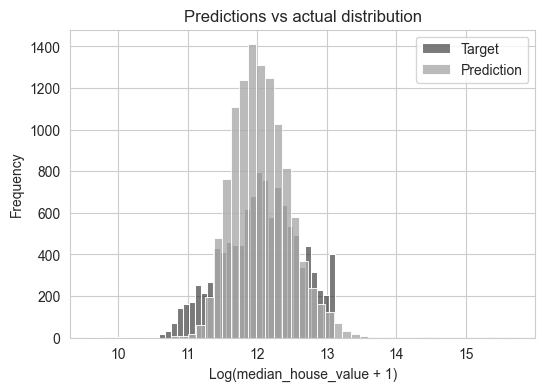

In [45]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='Target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='Prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(median_house_value + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [46]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [47]:
rmse(y_train, y_pred)

0.3743252818845074

In [48]:
y_pred = w_0 + df_val.dot(w)

In [49]:
rmse(y_val, y_pred)

0.3774660249348584